In [3]:
import sys
import cv2
import os
from sys import platform
import argparse

In [4]:
dir_path = os.path.dirname(os.path.abspath(''))
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append(dir_path + './python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append('./python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e

In [96]:
  # Flags
parser = argparse.ArgumentParser()
parser.add_argument("--image_path", default="./media/squat/squat-sideon.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
parser.add_argument("--3d")
args = parser.parse_known_args()

# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "./models/"

In [97]:
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()


# Process Image
datum = op.Datum()
imageToProcess = cv2.imread(args[0].image_path)
datum.cvInputData = imageToProcess
opWrapper.emplaceAndPop(op.VectorDatum([datum]))

# Display Image
print("Body keypoints: \n" + str(datum.poseKeypoints.shape))
# cv2.imshow("OpenPose 1.7.0 - Tutorial Python API", datum.cvOutputData)
# cv2.waitKey(0)

Body keypoints: 
(1, 25, 3)


In [103]:
poseModel = op.PoseModel.BODY_25
pairs = op.getPosePartPairs(poseModel)
limbs = {
    'back': [1,8],
    'head': [1,17],
    'rshoulder': [1,2],
    'lshoulder': [1,5],
    'rupperarm': [2,3],
    'rlowerarm': [3,4],
    'lupperarm': [5,6],
    'llowerarm': [6,7],
    'lhip': [8,12],
    'rhip': [8,9],
    'lthigh': [12,13],
    'rthigh': [9,10],
    'lshin': [13,14],
    'rshin': [10,11],
}
print(op.getPosePartPairs(poseModel))
mapping = op.getPoseBodyPartMapping(poseModel)
print(mapping)

[1, 8, 1, 2, 1, 5, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 8, 12, 12, 13, 13, 14, 1, 0, 0, 15, 15, 17, 0, 16, 16, 18, 2, 17, 5, 18, 14, 19, 19, 20, 14, 21, 11, 22, 22, 23, 11, 24]
{0: 'Nose', 1: 'Neck', 2: 'RShoulder', 3: 'RElbow', 4: 'RWrist', 5: 'LShoulder', 6: 'LElbow', 7: 'LWrist', 8: 'MidHip', 9: 'RHip', 10: 'RKnee', 11: 'RAnkle', 12: 'LHip', 13: 'LKnee', 14: 'LAnkle', 15: 'REye', 16: 'LEye', 17: 'REar', 18: 'LEar', 19: 'LBigToe', 20: 'LSmallToe', 21: 'LHeel', 22: 'RBigToe', 23: 'RSmallToe', 24: 'RHeel', 25: 'Background'}


             x           y     score        yinv
0   520.299927  215.743149  0.914323 -215.743149
1   402.959808  330.260193  0.663158 -330.260193
2   402.999359  344.365417  0.709353 -344.365417
3   609.868958  352.646149  0.800105 -352.646149
4   788.687622  358.223663  0.826615 -358.223663
5   400.174133  310.776947  0.374104 -310.776947
8   232.457275  601.464661  0.449534 -601.464661
9   224.138702  609.816711  0.569164 -609.816711
10  495.283539  643.395569  0.767042 -643.395569
11  369.363556  894.916687  0.710065 -894.916687
12  240.862900  595.853333  0.281181 -595.853333
13  495.250885  632.260437  0.419466 -632.260437
14  389.045288  867.057434  0.541783 -867.057434
15  500.891235  193.415176  0.941712 -193.415176
17  436.597534  207.297028  0.943398 -207.297028
19  500.805695  894.958374  0.590106 -894.958374
20  497.977722  889.270813  0.579061 -889.270813
21  346.965881  858.666260  0.185448 -858.666260
22  486.800171  936.847229  0.460942 -936.847229
23  436.525421  950.

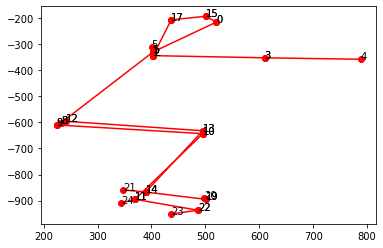

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(datum.poseKeypoints[0], columns=['x', 'y', 'score'])
df = df[df['score'] > 0]
df['yinv'] = -df['y']
print(df)

def plot_points(first_point,second_point):
    x, y = coordinates_for_point(first_point)
    x2, y2 = coordinates_for_point(second_point)
    plt.plot([x, x2], [y, y2], 'ro-')
    plt.annotate(first_point, xy=(x,y))
    plt.annotate(second_point, xy=(x2,y2))
    print(first_point, second_point, mapping[first_point], mapping[second_point])

def coordinates_for_point(first_point):
    x = df.loc[first_point]['x']
    y = df.loc[first_point]['yinv']
    return x, y

for i in range(0, len(pairs), 2):
    first_point = pairs[i]
    second_pont = pairs[i+1]
    try:
        plot_points(first_point, second_pont)
    except Exception as e:
        print(e)

# df.plot(x='x', y='yinv',kind='scatter')

1 8 Neck MidHip
1 17 Neck REar
1 2 Neck RShoulder
1 5 Neck LShoulder
2 3 RShoulder RElbow
3 4 RElbow RWrist
6
6
8 12 MidHip LHip
8 9 MidHip RHip
12 13 LHip LKnee
9 10 RHip RKnee
13 14 LKnee LAnkle
10 11 RKnee RAnkle


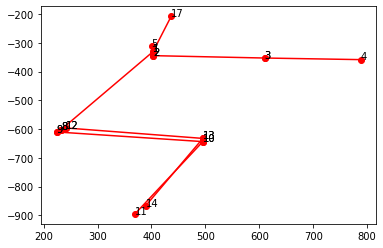

In [108]:
for (limb, joints) in limbs.items():
    try:
        plot_points(joints[0], joints[1])
    except Exception as e:
        print(e)

[-0.5322412  -0.84659266] [ 0.9991998  -0.03999672]
1 8 Neck MidHip
2 3 RShoulder RElbow
2.0920348
119.86476


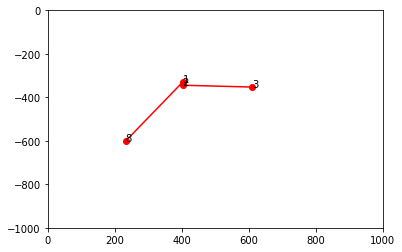

In [152]:
import math
import numpy as np

plt.xlim(0, 1000)

plt.ylim(-1000, 0)

def unit_vector(limb):
    x,y = coordinates_for_point(limbs[('%s' % limb)][0])
    x1,y1 = coordinates_for_point(limbs[limb][1])
    v1 = np.array([x1-x,y1-y])
    unit_vector = v1 / np.linalg.norm(v1)
    return unit_vector
unit_vector_1 = unit_vector('back')
unit_vector_2 = unit_vector('rupperarm')

print(unit_vector_1, unit_vector_2)

def plot_limb(limb):
    plot_points(limbs[limb][0], limbs[limb][1])
plot_limb('back')
plot_limb('rupperarm')


dot_product = np.dot(unit_vector_1, unit_vector_2)
rads = np.arccos(dot_product)
print(rads)
angle = np.degrees(rads)
print(angle)



In [149]:
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm


u = unit_vector_1
v = unit_vector_2
c = dot(u,v)/norm(u)/norm(v) # -> cosine of the angle
angle = arccos(clip(c, -1, 1))
np.degrees(angle)

106.19398087924807